# GG4257 - Urban Analytics
---
## Assignment 1
---

### Lab 4 Challenges
---
- <a href="#Challenge-1:-Removed-due-to-Windows-Error">Challenge 1</a>
- <a href="#Challenge-2:-Creating-an-ArcGIS-Dashboard">Challenge 2</a>
- <a href="#Challenge-3:">Challenge 3</a>


### Challenge 1: Removed due to Windows Error

### Challenge 2: Creating an ArcGIS Dashboard
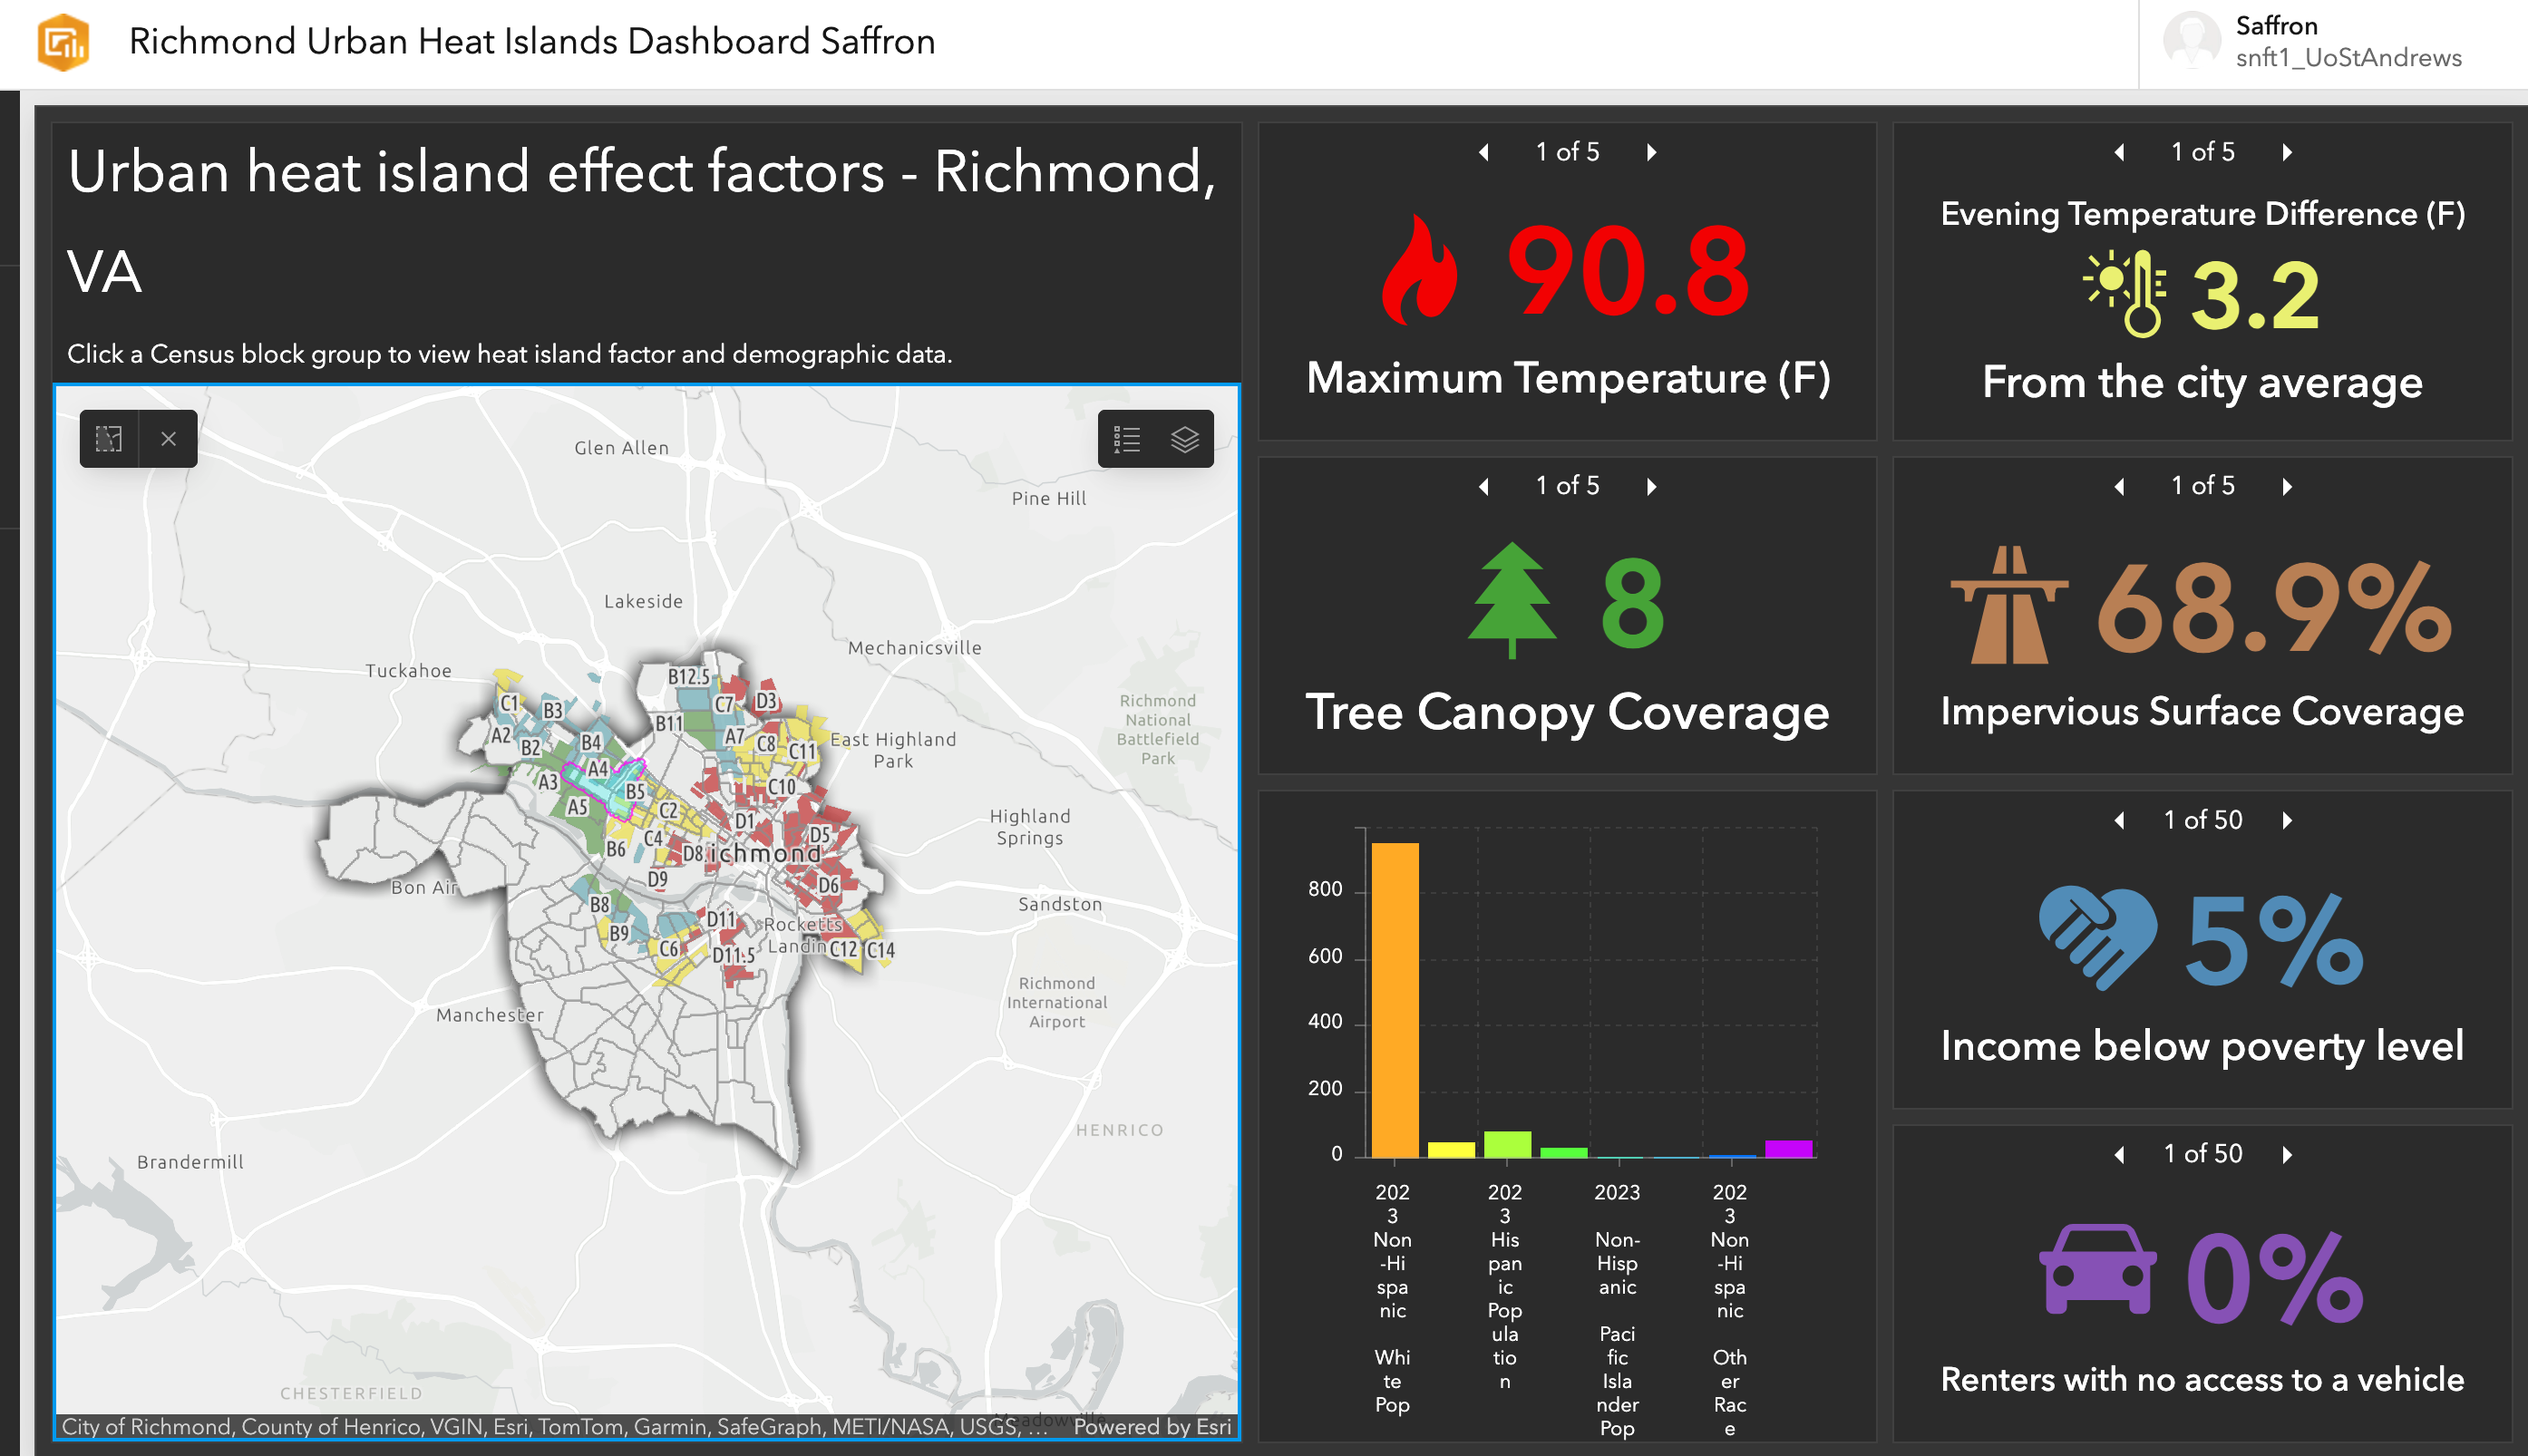

Url: https://www.arcgis.com/apps/dashboards/a0ed457ba2b54957aec0f89f80283905


### Challenge 3:
 
Now is the time for you to create some choropleth maps. 

1. Go to this portal https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/home
2. Get the Scottish Index of Multiple Deprivation (SIMD) 2020 dataset and extract the data only for the city of Edinburgh.
3. Create two static choropleth maps (e.g. `matplotlib`). These maps should represent an attribute you find interesting in the SIMD dataset. Using two different classifier methods, you need to show how the maps appear different even though the data and attributes are the same. Include a clear description of your choice and the difference in the classification method for the attribute chosen (e.g. Plotting histograms with breakpoints(bins). You can find a complete list of classifiers at https://pysal.org/mapclassify/api.html.
4. Finally, create other two interactive maps (e.g. `choropleth_mapbox`) - one for Glasgow and one for Edinburgh - to represent the difference in deprivation for both cities. Pick any of the available attributes.
   > As always include the appropriate descriptions and code comments where you narrate how you are processing the data. And the insights you get from the results.

In [ ]:
# importing everything we need for all following code cells

import geopandas as gpd
import plotly.express as px
import json
import mapclassify as mc
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [ ]:
# importing and saving as a geojson file
#only need to run this once as afterwards the file will be saved and can be used again

#SIMD_2020 = gpd.read_file('lab4 data/SG_SIMD_2020.shp')
#SIMD_2020.to_file('SIMD_2020_2.geojson', driver='GeoJSON')

In [ ]:
# reading in the new geojson file
SIMD_2020_geo = gpd.read_file('lab4 data/SIMD_2020_2.geojson')

In [ ]:
# finding out what the edinburgh is labelled as
SIMD_2020_geo['LAName'].unique()

In [ ]:
# subsetting dataframe with only edinburgh
edi_SIMD_2020 = SIMD_2020_geo.loc[(SIMD_2020_geo.LAName == "City of Edinburgh")]

edi_SIMD_2020.head()

In [ ]:
# having a little look at what attributes we've got available here
edi_SIMD_2020.columns

In [ ]:
# checking datatypes
edi_SIMD_2020.dtypes

In [ ]:
# checking crs
edi_SIMD_2020.crs

In [ ]:
# converting crs
edi_SIMD_2020 = edi_SIMD_2020.to_crs("EPSG:4326")

In [ ]:
num_classes = 5 # defining the number of classes

# Creating a natural breaks classification
class_nb = mc.NaturalBreaks(edi_SIMD_2020['CrimeRate'], k=num_classes)

# Creating an equal interval classification
class_ei = mc.EqualInterval(edi_SIMD_2020['CrimeRate'], k=num_classes)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8)) # configuring plots

# defining first plot - natural breaks
edi_SIMD_2020.plot(column='CrimeRate', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': class_nb.bins}
        )

axs[0].set_title("Choropleth Map of Crime Rates with Natural Breaks")

# defining second plot - equal interval
edi_SIMD_2020.plot(column='CrimeRate', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': class_ei.bins})

axs[1].set_title("Choropleth Map of Crime Rates with Equal Intervals")

plt.tight_layout()
plt.show()


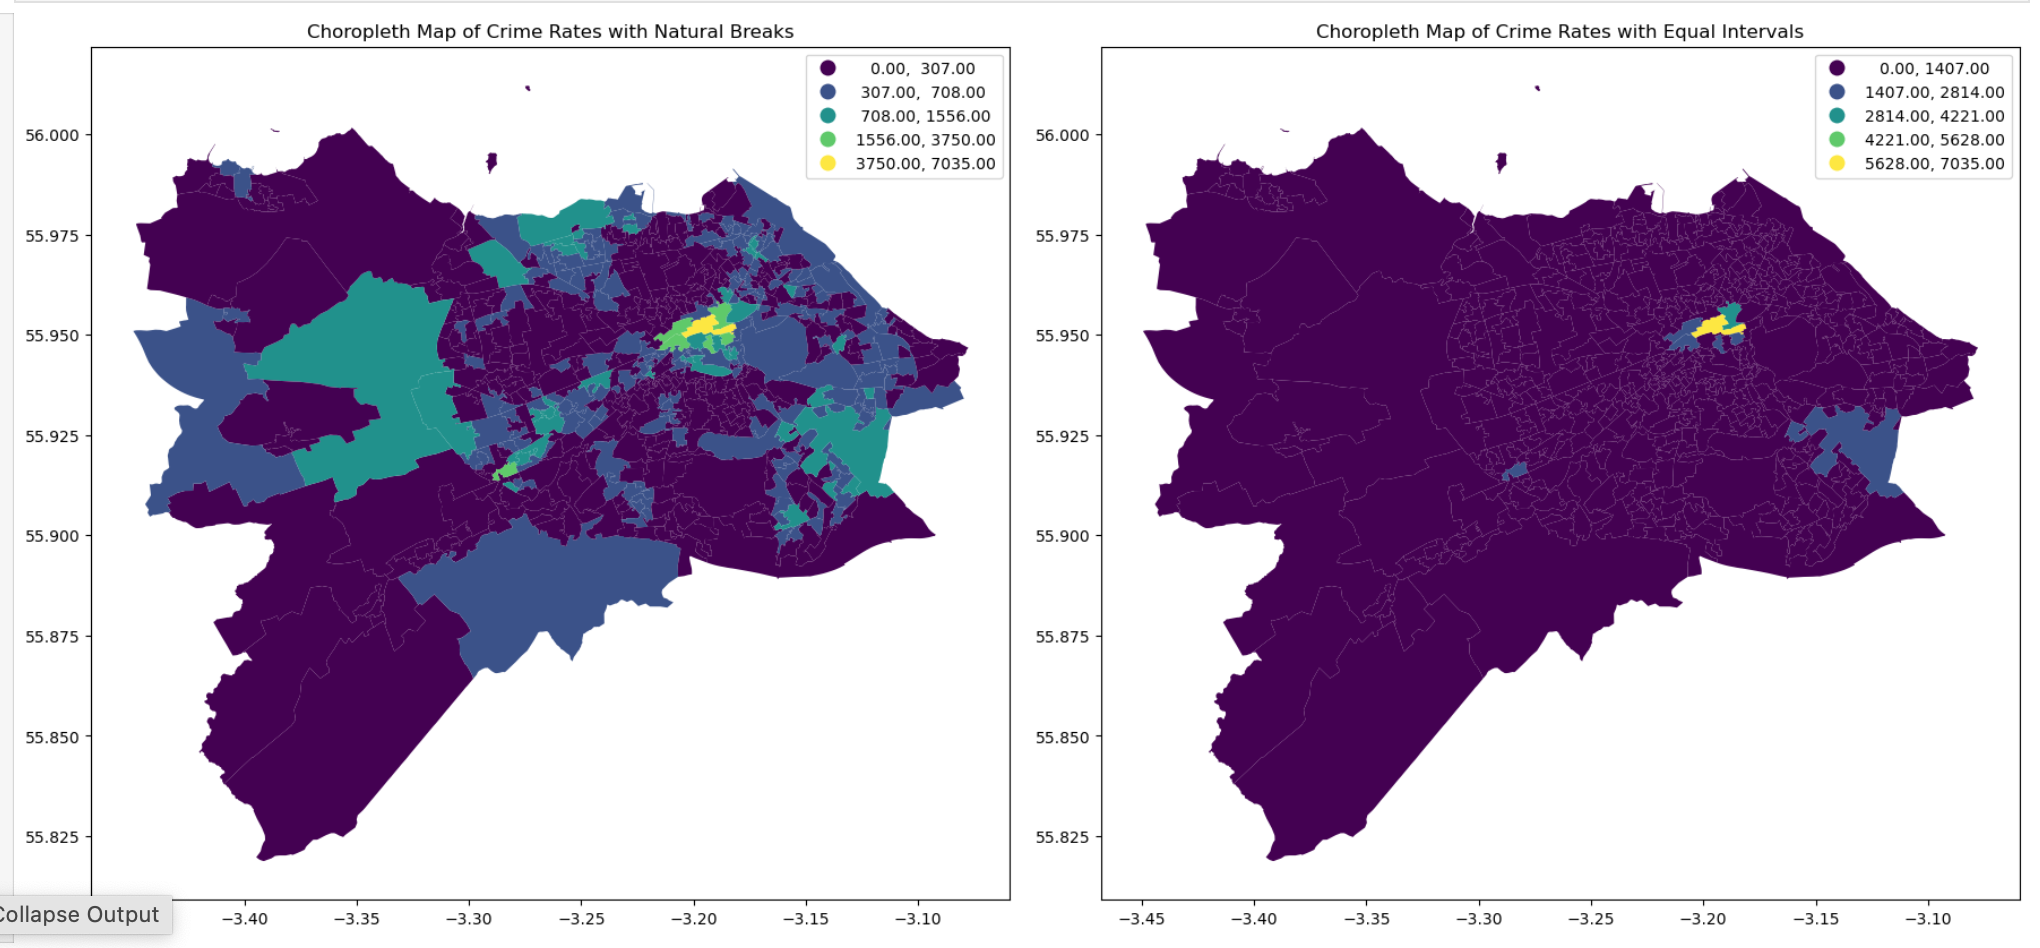


In [ ]:
# subsetting and projecting glasgow
glas_SIMD_2020 = SIMD_2020_geo.loc[(SIMD_2020_geo.LAName == "Glasgow City")]
glas_SIMD_2020 = glas_SIMD_2020.to_crs("EPSG:4326")

In [ ]:
# Natural Breaks classification for Glasgow
glas_class_nb = mc.NaturalBreaks(glas_SIMD_2020['CrimeRate'], k=num_classes)

In [ ]:
# class breaks for edinburgh
edi_classifier_nb = mc.NaturalBreaks(edi_SIMD_2020['CrimeCount'], k=num_classes)
edi_SIMD_2020['class_nb'] = class_nb.yb #yb to get the values from the array.

print(class_nb)
print(edi_SIMD_2020[['CrimeCount', 'class_nb']])

In [ ]:
# class breaks for glasgow
glas_classifier_nb = mc.NaturalBreaks(glas_SIMD_2020['CrimeCount'], k=num_classes)
glas_SIMD_2020['glas_class_nb'] = glas_class_nb.yb #yb to get the values from the array.

print(class_nb)
print(glas_SIMD_2020[['CrimeCount', 'glas_class_nb']])

In [ ]:
# creating natural breaks choropleth map for edinburgh
edinburgh_nb = px.choropleth_mapbox(edi_SIMD_2020,
                           geojson=edi_SIMD_2020.geometry,
                           locations=edi_SIMD_2020.index,
                           color="class_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.9534, "lon": -3.1884},
                           mapbox_style="carto-positron",
                           zoom=9.5)
edinburgh_nb.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
edinburgh_nb.show()

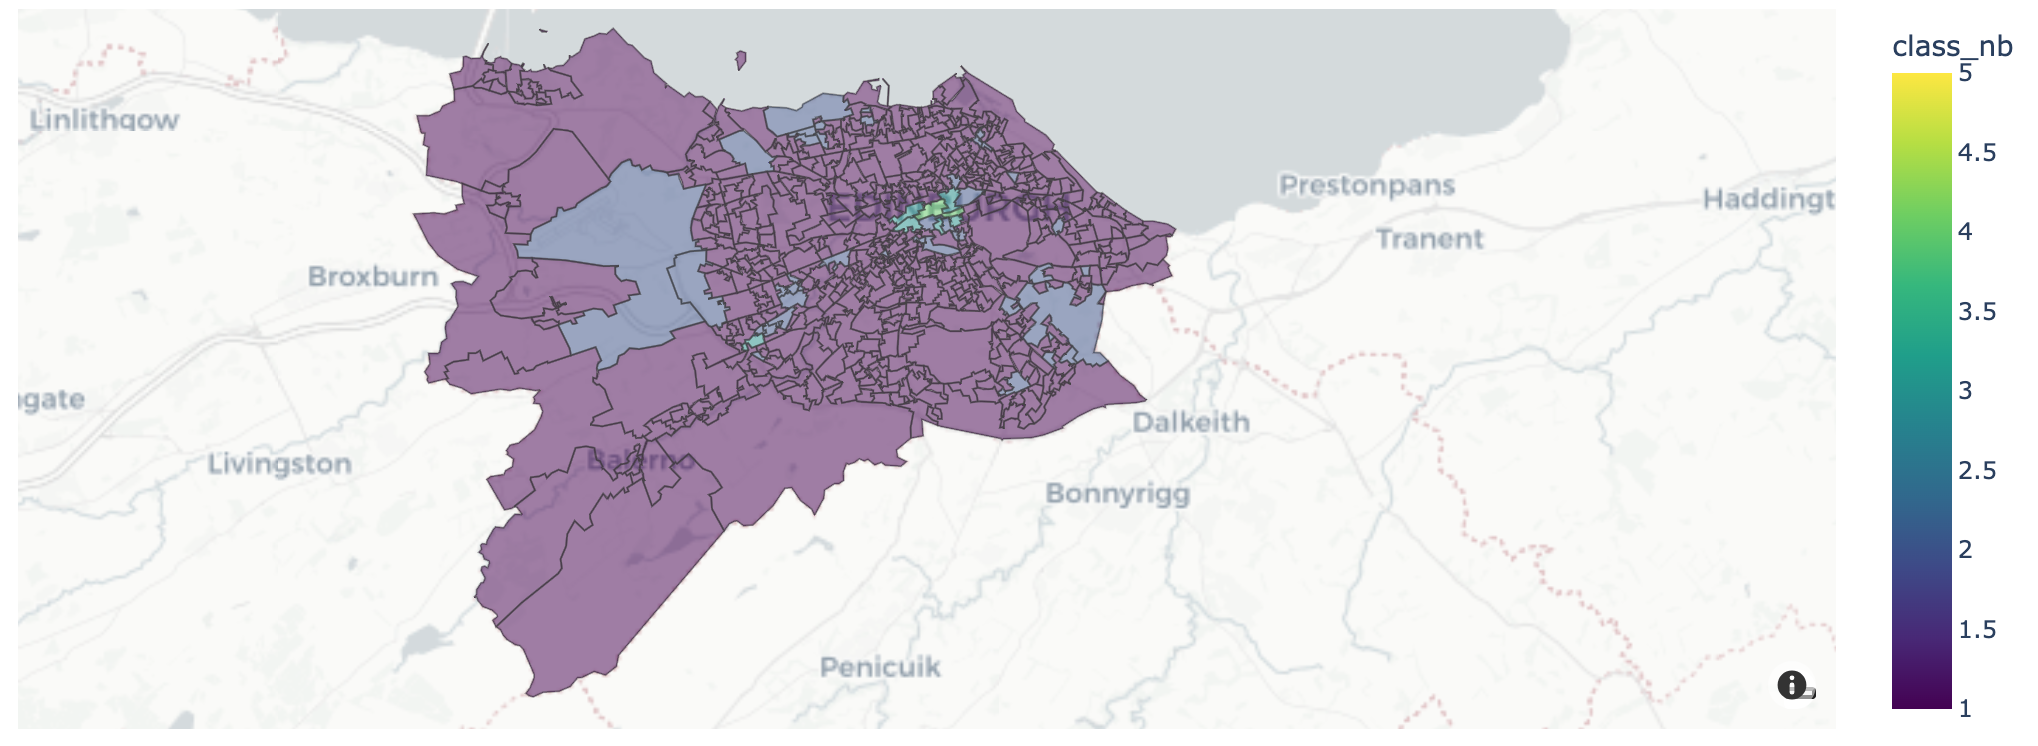

In [ ]:
# creating natural breaks choropleth map for glasgow
glasgow_nb = px.choropleth_mapbox(glas_SIMD_2020,
                           geojson=glas_SIMD_2020.geometry,
                           locations=glas_SIMD_2020.index,
                           color="glas_class_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
glasgow_nb.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
glasgow_nb.show()

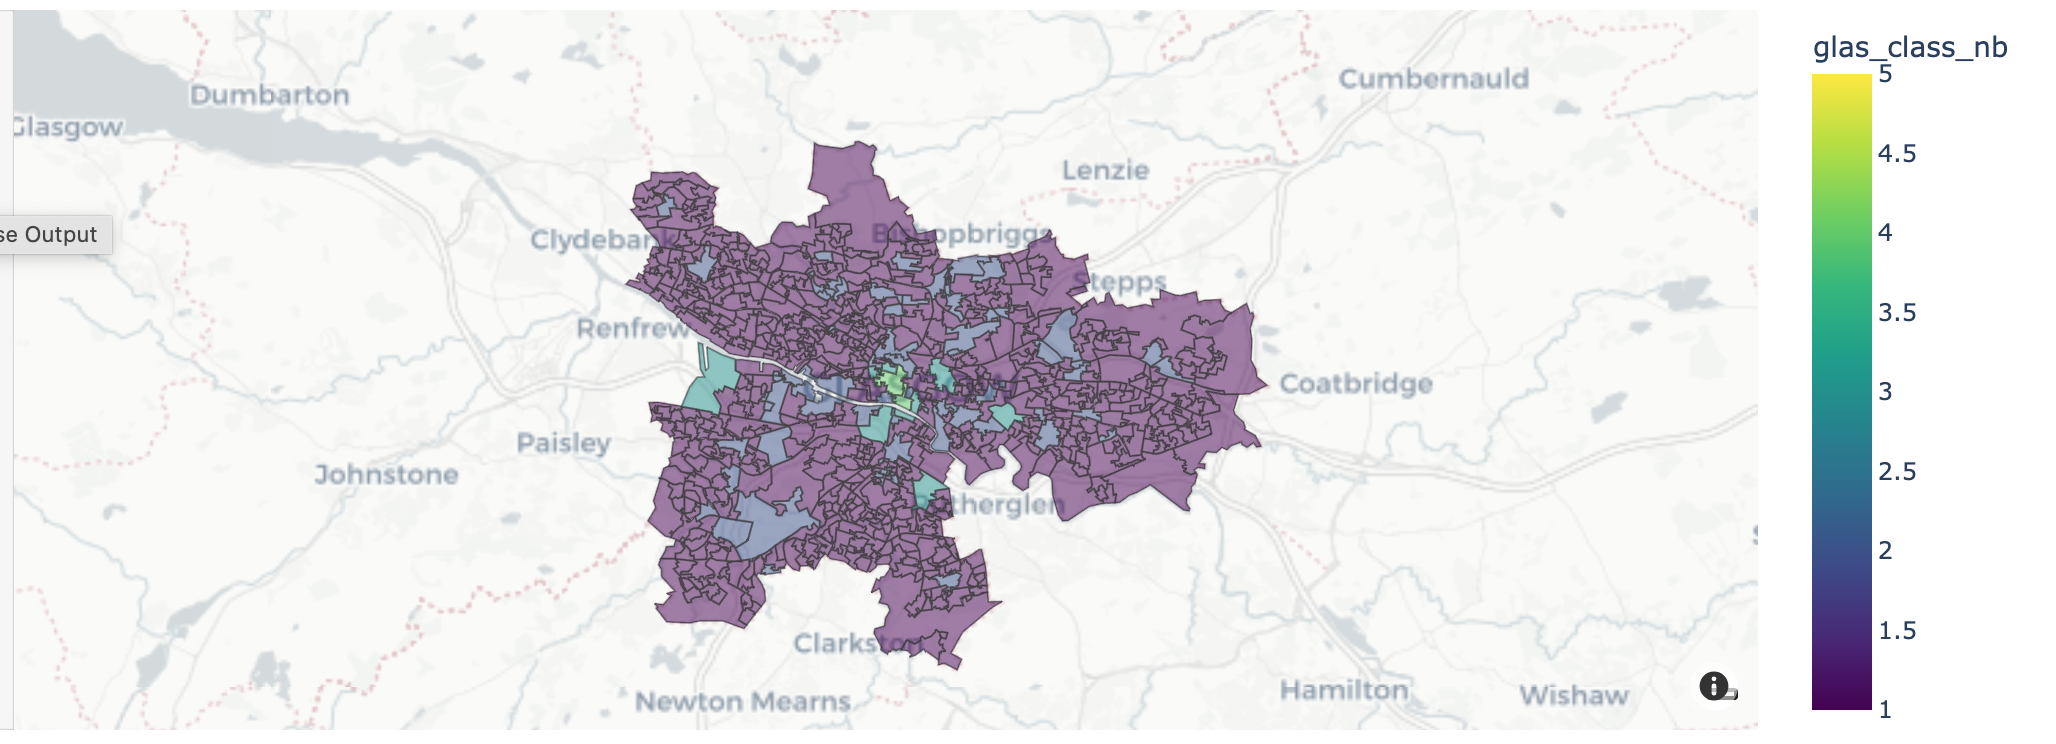

After reading in the dataset required for this challenge, we first sorted through the LANames column and used the pandas .loc function in order to subset all the data for Edinburgh. We clean up the data and project it to the CRS we desire, before setting about defining a class of natural breaks and of equal interval breaks. We configure a plot for this to be able to set these results next to eachother for ease of comparison. 

As we can see, the nature of our chosen indicator (CrimeRates), suits natural breaks much better than equal interval. A choropleth map with natural breaks allows for us to read much more detail from the map. The equal interval map lumps a significant number of areas into the break with the lowest amount of crime, meaning it's much more difficult to garner the more subtle trends in the data.

Happy with our selection of a natural breaks approach, we can move onto creating interactive maps of Edinburgh and Glasgow. We take the original dataframe we original read in, and subset, clean and project the data for Glasgow. Following the same methodology as earlier we calculate natural breaks for Glasgow, and print interactive choropleth maps for both cities!

This methodology was fairly straightforward. The only bumps in the road included remembering to check the CRS and project the data correctly, which was an easy fix once remembered!